## Dataset

Competition data for SIIM-ACR Pneumothorax Segmentation extracted from Public Google Cloud Healthcare API.
Chest Xrays and dense classification (RLE) of Pneumothorax data.

### Acknowledgement
https://www.kaggle.com/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data

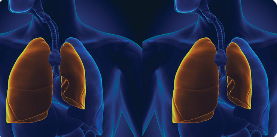

In [1]:
from keras.models import load_model
import pydicom as dicom
import matplotlib.pylab as plt
import numpy as np
from skimage import io
from PIL import Image
model = load_model("./dicom_deeplabv3_plus.hdf5", compile=False)

img_path='./dicom_files/1.2.276.0.7230010.3.1.4.8323329.353.1517875162.525916.dcm'
mask_path='./images/1024/mask/1.2.276.0.7230010.3.1.4.8323329.353.1517875162.525916.png'

In [2]:
def preprocess(img_path,mask_path):
    ds=dicom.dcmread(img_path)
    img=ds.pixel_array
    r_img = Image.fromarray(img)
    r_img = np.array(r_img.resize((272,192)))/255.
    S_img = np.stack((r_img,)*3, axis=-1)

    mask=io.imread(mask_path)
    r_mask = Image.fromarray(mask)
    r_mask = np.array(r_mask.resize((272,192)))/255.
    r_mask=r_mask.astype(np.int64)
    
    return S_img,r_mask

img,mask=preprocess(img_path,mask_path)
prediction = (model.predict(np.expand_dims(img, axis=0))[0,:,:,0] > 0.5).astype(np.uint8)

IoU Score: 0.77


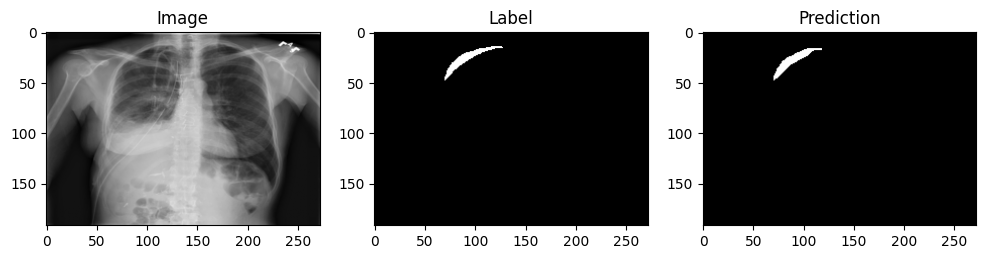

In [3]:
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow(img,cmap='gray')
plt.title('Image')
plt.subplot(132)
plt.imshow(mask,cmap='gray')
plt.title('Label')
plt.subplot(133)
plt.imshow(prediction,cmap='gray')
plt.title('Prediction')

Int = np.logical_and(mask, prediction)
iou = np.sum(Int) / ((np.sum(mask)+np.sum(prediction))- np.sum(Int))
print('IoU Score: %s' % iou)